<h3>Här är jupyter filen som tränar på de sorterade datasetten</h3>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump

df1 = pd.read_csv("data/dataframe1.csv", sep=';')
df2 = pd.read_csv("data/dataframe2.csv", sep=';')

<h3>Träning på dataset 1</h3>

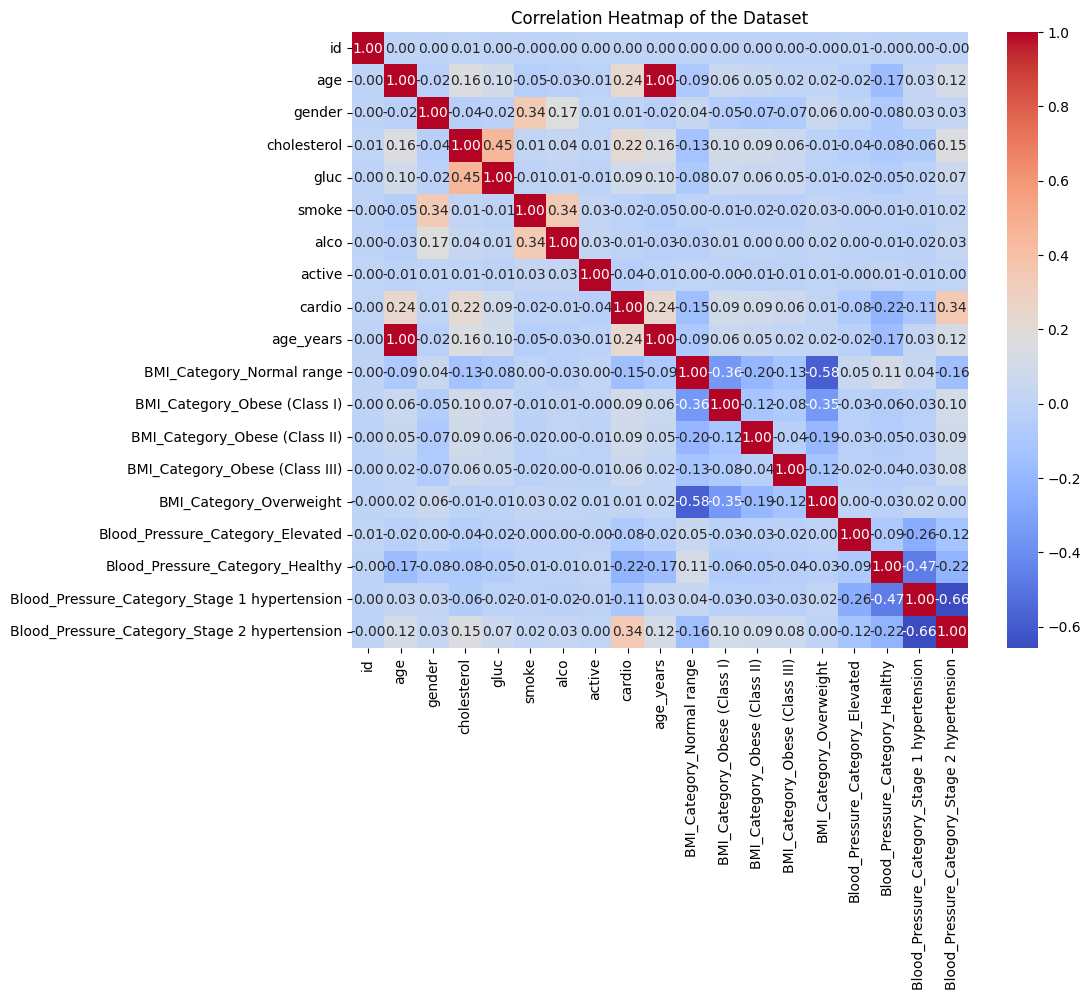

In [12]:
df1
# Calculate the correlation matrix
corr_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of the Dataset')
plt.show()


In [16]:
# Split your data into features and target
X = df1.drop(columns=['cardio'])
y = df1['cardio']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to perform Grid Search
def perform_grid_search(estimator, param_grid):
    pipeline = make_pipeline(StandardScaler(), estimator)
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Define parameter grids for each algorithm
param_grid_rf = {'randomforestclassifier__n_estimators': [100, 200], 'randomforestclassifier__max_depth': [None, 10, 20]}
param_grid_svc = {'svc__C': [0.1, 1, 10], 'svc__gamma': [1, 0.1, 0.01]}
param_grid_knn = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

# Conduct the grid search for each algorithm
best_rf, best_params_rf = perform_grid_search(RandomForestClassifier(), param_grid_rf)
best_svc, best_params_svc = perform_grid_search(SVC(), param_grid_svc)
best_knn, best_params_knn = perform_grid_search(KNeighborsClassifier(), param_grid_knn)

In [17]:
rf_score = best_rf.score(X_test, y_test)
svc_score = best_svc.score(X_test, y_test)
knn_score = best_knn.score(X_test, y_test)
results = {
     'Random Forest': {'Score': rf_score, 'Best Params': best_params_rf},
     'SVC': {'Score': svc_score, 'Best Params': best_params_svc},
     'KNN': {'Score': knn_score, 'Best Params': best_params_knn}
 }

print(results)

{'Random Forest': {'Score': 0.7026650025695617, 'Best Params': {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 200}}, 'SVC': {'Score': 0.7039864914470303, 'Best Params': {'svc__C': 1, 'svc__gamma': 0.1}}, 'KNN': {'Score': 0.6727112546802732, 'Best Params': {'kneighborsclassifier__n_neighbors': 7}}}


<h3>Results from dataframe1 using Random Forest, SVC, KNN</h3>
<p>
'Random Forest': {'Score': 0.7026650025695617, 'Best Params': {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 200}}
<br>
'SVC': {'Score': 0.7039864914470303, 'Best Params': {'svc__C': 1, 'svc__gamma': 0.1}}
<br>
'KNN': {'Score': 0.6727112546802732, 'Best Params': {'kneighborsclassifier__n_neighbors': 7}}
<br>
<br>
Tankar kring resultat: <br>
Resultatet kunde varit bättre, runt 70% träffsäkerhet är ju inte jättebra med tanke på att 50% av alla personer i datan har en hjärtkärlsjukdom.
Men ska ta och se hur det andra datasettet far med samma parametrar

</p>

In [ ]:
#Save the training done
dump(best_rf, "training/dataframe1_best_random_forest.joblib")
dump(best_svc, "training/dataframe1_best_svc.joblib")
dump(best_knn, "training/dataframe1_best_knn.joblib")

['dataframe1_best_knn.joblib']

Träning på dataset 2

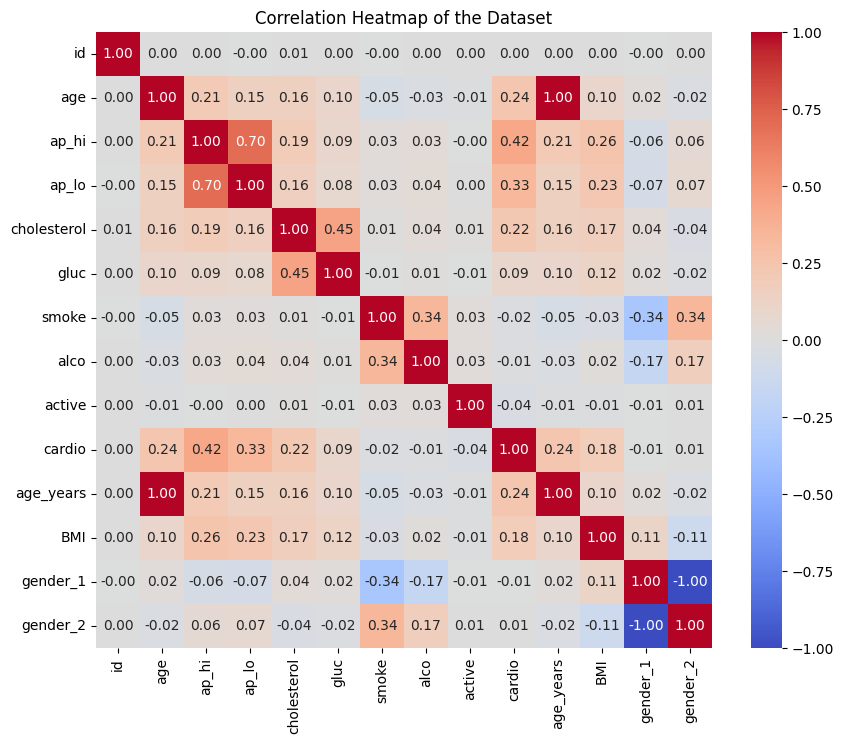

In [13]:
df2

# Calculate the correlation matrix
corr_matrix = df2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of the Dataset')
plt.show()


In [20]:
# Split your data into features and target
X = df2.drop(columns=['cardio'])
y = df2['cardio']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to perform Grid Search
def perform_grid_search(estimator, param_grid):
    pipeline = make_pipeline(StandardScaler(), estimator)
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Define parameter grids for each algorithm
param_grid_rf = {'randomforestclassifier__n_estimators': [100, 200], 'randomforestclassifier__max_depth': [None, 10, 20]}
param_grid_svc = {'svc__C': [0.1, 1, 10], 'svc__gamma': [1, 0.1, 0.01]}
param_grid_knn = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

# Conduct the grid search for each algorithm
best_rf, best_params_rf = perform_grid_search(RandomForestClassifier(), param_grid_rf)
best_svc, best_params_svc = perform_grid_search(SVC(), param_grid_svc)
best_knn, best_params_knn = perform_grid_search(KNeighborsClassifier(), param_grid_knn)

In [21]:
rf_score = best_rf.score(X_test, y_test)
svc_score = best_svc.score(X_test, y_test)
knn_score = best_knn.score(X_test, y_test)
results = {
     'Random Forest': {'Score': rf_score, 'Best Params': best_params_rf},
     'SVC': {'Score': svc_score, 'Best Params': best_params_svc},
     'KNN': {'Score': knn_score, 'Best Params': best_params_knn}
 }

print(results)

{'Random Forest': {'Score': 0.7344541516775567, 'Best Params': {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 100}}, 'SVC': {'Score': 0.7333529109463328, 'Best Params': {'svc__C': 1, 'svc__gamma': 0.1}}, 'KNN': {'Score': 0.7031054988620512, 'Best Params': {'kneighborsclassifier__n_neighbors': 7}}}


In [22]:
#Save the training done
dump(best_rf, "training/dataframe2_best_random_forest.joblib")
dump(best_svc, "training/dataframe2_best_svc.joblib")
dump(best_knn, "training/dataframe2_best_knn.joblib")

['training/dataframe2_best_knn.joblib']